In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Dataset_17_feat.csv")
data.head()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69


In [3]:
data=data[data['DP_Group'].str.contains('PLGA')]
data

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00


In [4]:
df17=data.drop(columns=['Experimental_index', 'DP_Group'])

In [5]:
## separating x and y
x=df17.drop(df17[['Release']], axis=1)
y=df17['Release']

### SVR

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
#scaling of the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
svr_model=SVR()
svr_model.fit(x_train_scaled, y_train)
y_pred_train = svr_model.predict(x_train_scaled)
y_pred_test = svr_model.predict(x_test_scaled)

# Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score for training set: {r2_train * 100}")
print(f"R2 score for test set: {r2_test * 100}")


R2 score for training set: 87.78642036481912
R2 score for test set: 84.19893524402853


### Hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma':['scale', 'auto'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3], 
}

tuned_svr_model=GridSearchCV(estimator=svr_model, param_grid=param_grid, verbose=2)

tuned_svr_model.fit(x_train_scaled, y_train)

tuned_svr_model.best_score_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV]

[CV] END C=0.1, degree=2, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.3, gamma=auto, kernel=poly; t

[CV] END C=0.1, degree=3, epsilon=0.2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.3, gamma=scale, kernel

[CV] END C=1, degree=2, epsilon=0.2, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, degree=2, epsilon=0.2, gamma=auto, kernel=poly; total time=   0.0

[CV] END C=1, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, degree=3, epsilon=0.2, gamma=scale, kernel=poly; total time=   0

[CV] END C=10, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.9s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.9s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.7s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=linear; total time=   1.8s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=linear; total time=   2.0s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=poly; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.1, gamma=auto, kernel=poly; total

[CV] END C=10, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=10, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=linear; total time=   2.5s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.2s
[CV] END C=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly; tot

[CV] END C=10, degree=3, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=3, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, degree=3, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=3, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, degree=3, epsilon=0.3, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.4s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.3s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.5s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.4s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=linear; total time=   0.5s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=10, degree=3, epsilon=0.3, gamma=auto, kernel=poly; total

NameError: name 'tuned_xgb_model' is not defined

In [27]:
tuned_svr_model.best_score_

0.8884794803044052

In [28]:
tuned_svr_model.best_params_

{'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [7]:
svr_model=SVR(C= 10, degree= 2, epsilon= 0.1, gamma= 'scale', kernel= 'rbf')
svr_model.fit(x_train_scaled, y_train)
y_pred_train = svr_model.predict(x_train_scaled)
y_pred_test = svr_model.predict(x_test_scaled)

# Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score for training set: {r2_train * 100}")
print(f"R2 score for test set: {r2_test * 100}")

R2 score for training set: 91.5102204616498
R2 score for test set: 88.46751475854732


In [19]:
x_train.columns

Index(['LA/GA', 'Polymer_MW', 'CL Ratio', 'Drug_Tm', 'Drug_Pka',
       'Initial D/M ratio', 'DLC', 'SA-V', 'SE', 'Drug_Mw', 'Drug_TPSA',
       'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25', 'T=0.5', 'T=1.0'],
      dtype='object')

In [8]:
#DEX-PLGA,index-111
new1_data = {
    "LA/GA": [1] * 27,
    "Polymer_MW": [46000] * 27,
    "CL Ratio": [0] * 27,
    "Drug_Tm": [262] * 27,
    "Drug_Pka": [12.42] * 27,
    "Initial D/M ratio": [0.18] * 27,
    'DLC':[0.12]*27,
    "SA-V": [113.21] * 27,
    "SE": [0] * 27,
    "Drug_Mw": [392.47] * 27,
    "Drug_TPSA":[94.83]*27,
    "Drug_NHA":[6]*27,
    "Drug_LogP": [1.9] * 27,
    "Time":[ 0, 0.52, 1.3, 2.17, 3.22, 4.35, 9.22, 10.35, 11.06, 11.41, 14.03, 
    14.47, 15.17, 15.52, 16.05, 16.49, 17.1, 17.45, 18.16, 18.51, 
    21.58, 22.19, 22.64, 23.15, 23.68, 24.2, 24.64],
    "T=0.25":[0]*27,
    "T=0.5":[0.01]*27,
    "'T=1.0":[0.01]*27
}

df_dex = pd.DataFrame(new1_data)


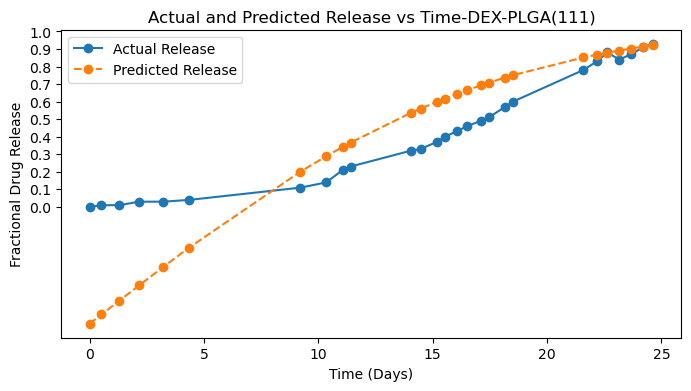

In [11]:
#function to visualize the actual vs predicted over time
def actualVsPredcited(new_data, predicted_release, actual_release, time):
    #DataFrame for actual values
    df_actual = pd.DataFrame({"Actual_Release": actual_release, "Time": time})

    # DataFrame for predicted values
    df_predicted = pd.DataFrame({"Predicted_Release": predicted_release, "Time": time})

    # Plot actual and predicted release values against time
    plt.figure(figsize=(8, 4))
    plt.plot(df_actual["Time"], df_actual["Actual_Release"], marker='o', label='Actual Release')
    plt.plot(df_predicted["Time"], df_predicted["Predicted_Release"], marker='o', linestyle='--', label='Predicted Release')
    plt.xlabel('Time (Days)')
    plt.ylabel('Fractional Drug Release')
    plt.title('Actual and Predicted Release vs Time-DEX-PLGA(111)')
    plt.legend()
    plt.yticks([i * 0.1 for i in range(int(max(max(df_actual["Actual_Release"]), max(df_predicted["Predicted_Release"])) * 10) + 2)])
    plt.show()

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_dex)
predicted_release = svr_model.predict(scaled_df)
actual_release =[
    0, 0.01, 0.01, 0.03, 0.03, 0.04, 0.11, 0.14, 0.21, 0.23, 
    0.32, 0.33, 0.37, 0.4, 0.43, 0.46, 0.49, 0.51, 0.57, 0.6, 
    0.78, 0.83, 0.88, 0.84, 0.87, 0.91, 0.93
]
time =[ 0, 0.52, 1.3, 2.17, 3.22, 4.35, 9.22, 10.35, 11.06, 11.41, 14.03, 
    14.47, 15.17, 15.52, 16.05, 16.49, 17.1, 17.45, 18.16, 18.51, 
    21.58, 22.19, 22.64, 23.15, 23.68, 24.2, 24.64]

#calling the function
actualVsPredcited(new1_data, predicted_release, actual_release, time)


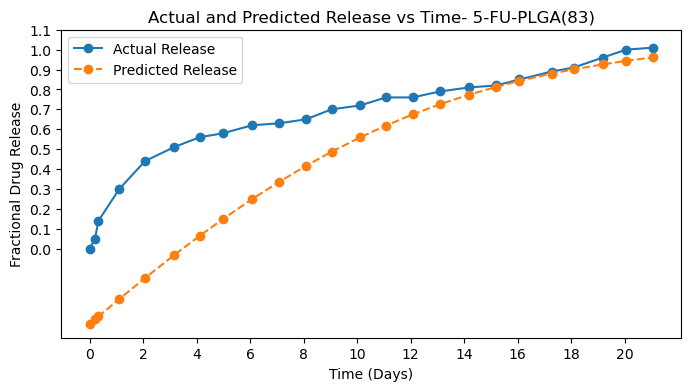

In [10]:
#5-FU-PLGA,index-83
new1_data = {
    "LA/GA": [1] * 24,
    "Polymer_MW": [104000] * 24,
    "CL Ratio": [0] * 24,
    "Drug_Tm": [282.5] * 24,
    "Drug_Pka": [7.76] * 24,
    "Initial D/M ratio": [0.8] * 24,
    "DLC":[0.24]*24,
    "SA-V": [152.76] * 24,
    "SE": [0] * 24,
    "Drug_Mw": [130.08] * 24,
    "Drug_TPSA":[65.72]*24,
    "Drug_NHA":[5]*24,
    "Drug_LogP": [-0.8] * 24,
    "Time": [0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08, 8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06],
    "T=0.25": [0.09] * 24,
    "T=0.5":[0.16]*24,
    "T=1.0":[0.28]*24
}

df_FU = pd.DataFrame(new1_data)


#function to visualize the actual vs predicted over time
def actualVsPredcited(new_data, predicted_release, actual_release, time):
    #DataFrame for actual values
    df_actual = pd.DataFrame({"Actual_Release": actual_release, "Time": time})

    # DataFrame for predicted values
    df_predicted = pd.DataFrame({"Predicted_Release": predicted_release, "Time": time})

    # Plot actual and predicted release values against time
    plt.figure(figsize=(8, 4))
    plt.plot(df_actual["Time"], df_actual["Actual_Release"], marker='o', label='Actual Release')
    plt.plot(df_predicted["Time"], df_predicted["Predicted_Release"], marker='o', linestyle='--', label='Predicted Release')
    plt.xlabel('Time (Days)')
    plt.ylabel('Fractional Drug Release')
    plt.title('Actual and Predicted Release vs Time- 5-FU-PLGA(83)')
    plt.legend()
    plt.xticks(range(0, int(max(time)) + 1, 2))
    plt.yticks([i * 0.1 for i in range(int(max(max(df_actual["Actual_Release"]), max(df_predicted["Predicted_Release"])) * 10) + 2)])
    plt.show()

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_FU)
predicted_release = svr_model.predict(scaled_df)
actual_release = [0, 0.05, 0.14, 0.3, 0.44, 0.51, 0.56, 0.58, 0.62, 0.63, 0.65, 0.7, 0.72, 0.76, 0.76, 0.79, 0.81, 0.82, 0.85, 0.89, 0.91, 0.96, 1, 1.01]
time = [0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08, 8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06]

#calling the function
actualVsPredcited(new1_data, predicted_release, actual_release, time)



### Adaboost

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
adb_model=AdaBoostRegressor()
adb_model.fit(x_train, y_train)
y_pred=adb_model.predict(x_test)
y_train_pred=adb_model.predict(x_train)

print(f"R2 score for training set: {(r2_score(y_train_pred, y_train))*100}")
print(f"R2 score for test set: {(r2_score(y_pred, y_test))*100}")


R2 score for training set: 50.63698024001564
R2 score for test set: 47.6946985895664


### Hyperparameter tuning

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.01, 0.05, 0.1, 1],
    'loss':['linear', 'square', 'exponential'],
    'random_state': [42],
   
}

tuned_adb_model=GridSearchCV(estimator=adb_model, param_grid=param_grid, verbose=2)

tuned_adb_model.fit(x_train, y_train)

tuned_adb_model.best_params_
tuned_adb_model.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.01, loss=linear, n_estimators=50, random_state=42; total time=   0.3s
[CV] END learning_rate=0.01, loss=linear, n_estimators=50, random_state=42; total time=   0.2s
[CV] END learning_rate=0.01, loss=linear, n_estimators=50, random_state=42; total time=   0.2s
[CV] END learning_rate=0.01, loss=linear, n_estimators=50, random_state=42; total time=   0.2s
[CV] END learning_rate=0.01, loss=linear, n_estimators=50, random_state=42; total time=   0.1s
[CV] END learning_rate=0.01, loss=linear, n_estimators=100, random_state=42; total time=   0.5s
[CV] END learning_rate=0.01, loss=linear, n_estimators=100, random_state=42; total time=   0.4s
[CV] END learning_rate=0.01, loss=linear, n_estimators=100, random_state=42; total time=   0.5s
[CV] END learning_rate=0.01, loss=linear, n_estimators=100, random_state=42; total time=   0.4s
[CV] END learning_rate=0.01, loss=linear, n_estimators=100, random_state=42; to

[CV] END learning_rate=0.1, loss=exponential, n_estimators=100, random_state=42; total time=   0.5s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100, random_state=42; total time=   0.5s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100, random_state=42; total time=   0.5s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100, random_state=42; total time=   0.4s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100, random_state=42; total time=   0.4s
[CV] END learning_rate=1, loss=linear, n_estimators=50, random_state=42; total time=   0.1s
[CV] END learning_rate=1, loss=linear, n_estimators=50, random_state=42; total time=   0.2s
[CV] END learning_rate=1, loss=linear, n_estimators=50, random_state=42; total time=   0.1s
[CV] END learning_rate=1, loss=linear, n_estimators=50, random_state=42; total time=   0.2s
[CV] END learning_rate=1, loss=linear, n_estimators=50, random_state=42; total time=   0.1s
[CV] END learning_rate=1, loss=linear, n

0.8044354067096153

In [9]:
tuned_adb_model.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 50, 'random_state': 42}

In [12]:
adb_model=AdaBoostRegressor(learning_rate= 1, loss= 'square', n_estimators= 50, random_state=42)
adb_model.fit(x_train, y_train)
y_pred=adb_model.predict(x_test)
y_train_pred=adb_model.predict(x_train)

print(f"R2 score for training set: {(r2_score(y_train_pred, y_train))*100}")
print(f"R2 score for test set: {(r2_score(y_pred, y_test))*100}")

R2 score for training set: 55.258888339239796
R2 score for test set: 53.98543413566371
